<a href="https://colab.research.google.com/github/DIFACQUIM/Art-Driven-by-Visual-Representations-of-Chemical-Space-/blob/main/FLAVOR_CATEGORIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.utils import io
import tqdm.notebook
import os, sys, random
total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
      # Install rdkit
      !pip -q install rdkit
      pbar.update(50)
      !pip -q install venn
      pbar.update(100)
import pandas as pd
import numpy as np
from sys import argv

  0%|          | 0/100 [00:00<?, ?it/s]

In [2]:
# For save files at drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
url = "https://raw.githubusercontent.com/DIFACQUIM/Art-Driven-by-Visual-Representations-of-Chemical-Space-/main/Datasets/FOODB_CURATED_21APRIL2023.csv"
FOODB = pd.read_csv(url)
FOODB.head(2)

,ID,PUBLIC_ID,NAME,SMILES,NEW_SMILES
0,4,FDB000004,Cyanidin 3-(6''-acetyl-galactoside),[H][C@]1(COC(C)=O)O[C@@]([H])(OC2=CC3=C(O)C=C(...,CC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c2ccc(O)...
1,13,FDB000013,Cyanidin 3-(6''-succinyl-glucoside),[H][C@]1(COC(=O)CCC(O)=O)O[C@@]([H])(OC2=CC3=C...,O=C(O)CCC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c...


In [4]:
#Select columns
FOODB = FOODB [['ID','NAME','NEW_SMILES']]
FOODB.columns = ['COMPOUND_ID', 'NAME_FOOD_DB', 'NEW_SMILES']
FOODB.head(2)

,COMPOUND_ID,NAME_FOOD_DB,NEW_SMILES
0,4,Cyanidin 3-(6''-acetyl-galactoside),CC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c2ccc(O)...
1,13,Cyanidin 3-(6''-succinyl-glucoside),O=C(O)CCC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c...


In [5]:
FOODB["FLAVOR_ID"] = ["FOODB" for x in FOODB["NEW_SMILES"]]
FOODB["NAME_FLAVOR"] = ["UNFLAVOR" for x in FOODB["NEW_SMILES"]]
FOODB['FLAVOR_GROUP'] =["UNFLAVOR_GROUP" for x in FOODB["NEW_SMILES"]]
FOODB.shape

(52856, 6)

In [6]:
# Remove repeated compounds
FOODB = FOODB.drop_duplicates(subset=["NEW_SMILES"], keep="first").reset_index(drop=True)
FOODB.shape

(52856, 6)

In [7]:
url = "https://raw.githubusercontent.com/DIFACQUIM/Art-Driven-by-Visual-Representations-of-Chemical-Space-/main/Datasets/FLAVOR_CATEGORIES_27APRIL2023.csv"
FLAVORS = pd.read_csv(url)
FLAVORS.shape

(4964, 6)


## 1. Ground flavors

In [8]:
# Green
GREEN = FLAVORS[FLAVORS["FLAVOR_GROUP"] == str("green")]
GREEN = GREEN.drop_duplicates(subset=["NEW_SMILES"], keep="first").reset_index(drop=True)
print(GREEN.shape)
# Earthy
EARTHY = FLAVORS[FLAVORS["FLAVOR_GROUP"] == str('earthy')]
EARTHY = EARTHY.drop_duplicates(subset=["NEW_SMILES"], keep="first").reset_index(drop=True)
print(EARTHY.shape)
# Herbaceous
HERBACEOUS = FLAVORS[FLAVORS["FLAVOR_GROUP"] == str('herbaceous')]
HERBACEOUS = HERBACEOUS.drop_duplicates(subset=["NEW_SMILES"], keep="first").reset_index(drop=True)
print(HERBACEOUS.shape)
# Concat datasets
result = pd.concat([FOODB, GREEN, EARTHY, HERBACEOUS])
print(result.shape)
# Save ground_flavors_and_allFooDB
result.to_csv("01_ground_flavors_and_allFooDB.csv", sep=",", index=False)
# Save only ground_flavors
result = result[result["FLAVOR_GROUP"] != str("UNFLAVOR_GROUP")]
print(result.shape)
result.to_csv("01_ground_flavors_16JUNE2023.csv", sep=",", index=False)

(425, 6)
(184, 6)
(46, 6)
(53511, 6)
(655, 6)


Text(0.5, 0.98, 'COMPOUNDS')

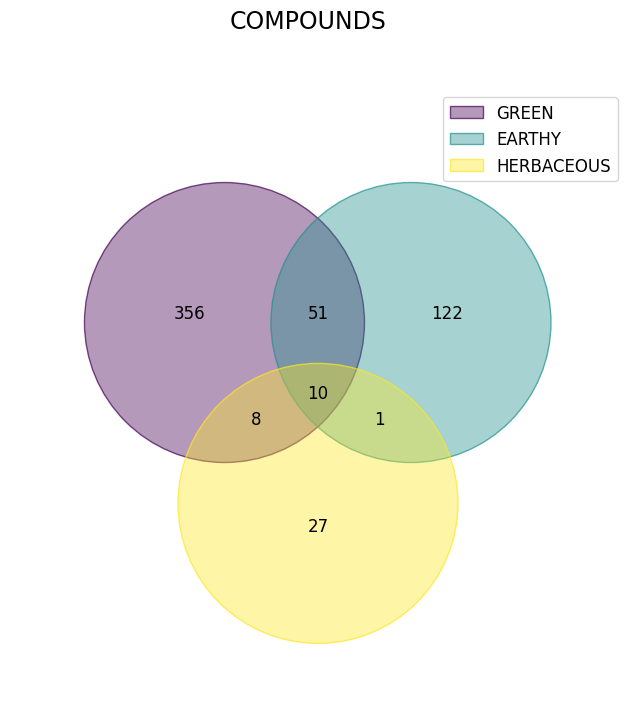

In [9]:
from venn import venn
import matplotlib.pyplot as plt
# Split dataset
GREEN = result[result["FLAVOR_GROUP"]==str('green')]
EARTHY = result[result["FLAVOR_GROUP"]==str('earthy')]
HERBACEOUS = result[result["FLAVOR_GROUP"]==str('herbaceous')]
# Generate venn diagram
COMPOUNDS = {"GREEN":set(GREEN["NEW_SMILES"]),
             "EARTHY":set(EARTHY["NEW_SMILES"]),
             "HERBACEOUS":set(HERBACEOUS["NEW_SMILES"])}
COMPOUNDS = venn(COMPOUNDS, fontsize=12)
plt.suptitle("COMPOUNDS", fontsize=17)

## 2. Wine-tasting

In [10]:
# FRUITY
FRUITY = FLAVORS[FLAVORS["FLAVOR_GROUP"]==str('fruity')]
FRUITY = FRUITY.drop_duplicates(subset=["NEW_SMILES"], keep="first").reset_index(drop=True)
print(FRUITY.shape)
# FLORAL
FLORAL = FLAVORS[FLAVORS["FLAVOR_GROUP"]==str('floral')]
FLORAL = FLORAL.drop_duplicates(subset=["NEW_SMILES"], keep="first").reset_index(drop=True)
print(FLORAL.shape)
# Concat datasets
result = pd.concat([FOODB, FRUITY, FLORAL])
print(result.shape)
# Save ground_flavors_and_allFooDB
result.to_csv("02_wine_notes_and_allFooDB.csv", sep=",", index=False)
# Save only ground_flavors
result = result[result["FLAVOR_GROUP"] != str("UNFLAVOR_GROUP")]
print(result.shape)
result.to_csv("02_wine_notes_16JUNE2023.csv", sep=",", index=False)

(668, 6)
(356, 6)
(53880, 6)
(1024, 6)


Text(0.5, 0.98, 'COMPOUNDS')

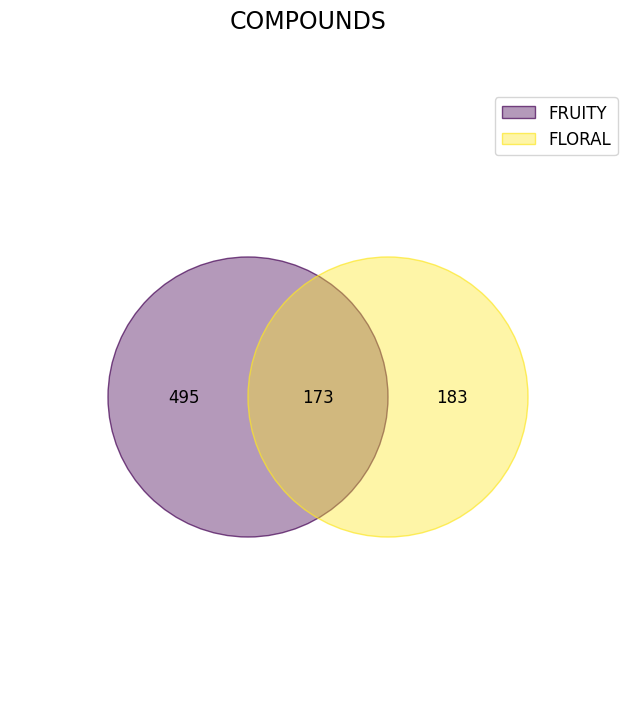

In [11]:
from venn import venn
import matplotlib.pyplot as plt
# Split dataset
FRUITY = result[result["FLAVOR_GROUP"]==str('fruity')]
FLORAL = result[result["FLAVOR_GROUP"]==str('floral')]

# Generate venn diagram
COMPOUNDS = {"FRUITY":set(FRUITY["NEW_SMILES"]),
             "FLORAL":set(FLORAL["NEW_SMILES"])
             }
COMPOUNDS = venn(COMPOUNDS, fontsize=12)
plt.suptitle("COMPOUNDS", fontsize=17)

## 3. Fatty and spicy

In [12]:
# FATTY
FATTY = FLAVORS[FLAVORS["FLAVOR_GROUP"]==str('fatty')]
FATTY = FATTY.drop_duplicates(subset=["NEW_SMILES"], keep="first").reset_index(drop=True)
print(FATTY.shape)
# SPICY
SPICY = FLAVORS[FLAVORS["FLAVOR_GROUP"]==str('spicy')]
SPICY = SPICY.drop_duplicates(subset=["NEW_SMILES"], keep="first").reset_index(drop=True)
print(SPICY.shape)
# Concat datasets
result = pd.concat([FOODB, FATTY, SPICY])
print(result.shape)
# Save ground_flavors_and_allFooDB
result.to_csv("03_fatty_spicy_and_allFooDB.csv", sep=",", index=False)
# Save only ground_flavors
result = result[result["FLAVOR_GROUP"] != str("UNFLAVOR_GROUP")]
print(result.shape)
result.to_csv("03_fatty_spicy_16JUNE2023.csv", sep=",", index=False)

(300, 6)
(130, 6)
(53286, 6)
(430, 6)


Text(0.5, 0.98, 'COMPOUNDS')

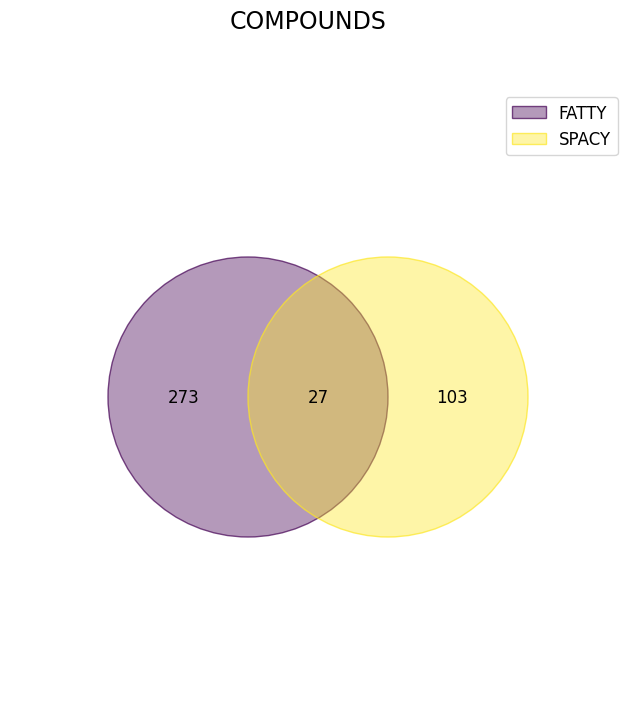

In [13]:
from venn import venn
import matplotlib.pyplot as plt
# Split dataset
FATTY = result[result["FLAVOR_GROUP"]==str('fatty')]
SPACY = result[result["FLAVOR_GROUP"]==str('spicy')]

# Generate venn diagram
COMPOUNDS = {"FATTY":set(FATTY["NEW_SMILES"]),
             "SPACY":set(SPACY["NEW_SMILES"])
             }
COMPOUNDS = venn(COMPOUNDS, fontsize=12)
plt.suptitle("COMPOUNDS", fontsize=17)

# 4. Natural remedies

In [14]:
# BALSAMIC
BALSAMIC = FLAVORS[FLAVORS["FLAVOR_GROUP"]==str('balsamic')]
BALSAMIC = BALSAMIC.drop_duplicates(subset=["NEW_SMILES"], keep="first").reset_index(drop=True)
print(BALSAMIC.shape)
# CHEMICAL
CHEMICAL = FLAVORS[FLAVORS["FLAVOR_GROUP"]==str('chemical')]
CHEMICAL = CHEMICAL.drop_duplicates(subset=["NEW_SMILES"], keep="first").reset_index(drop=True)
print(CHEMICAL.shape)
# MEDICINAL
MEDICINAL = FLAVORS[FLAVORS["FLAVOR_GROUP"]==str('medicinal')]
MEDICINAL = MEDICINAL.drop_duplicates(subset=["NEW_SMILES"], keep="first").reset_index(drop=True)
print(MEDICINAL.shape)
# Concat datasets
result = pd.concat([FOODB,BALSAMIC, CHEMICAL, MEDICINAL])
print(result.shape)
# Save ground_flavors_and_allFooDB
result.to_csv("04_natural_remedies_and_allFooDB.csv", sep=",", index=False)
# Save only ground_flavors
result = result[result["FLAVOR_GROUP"] != str("UNFLAVOR_GROUP")]
print(result.shape)
result.to_csv("04_natural_remedies_16JUNE2023.csv", sep=",", index=False)

(624, 6)
(117, 6)
(21, 6)
(53618, 6)
(762, 6)


Text(0.5, 0.98, 'COMPOUNDS')

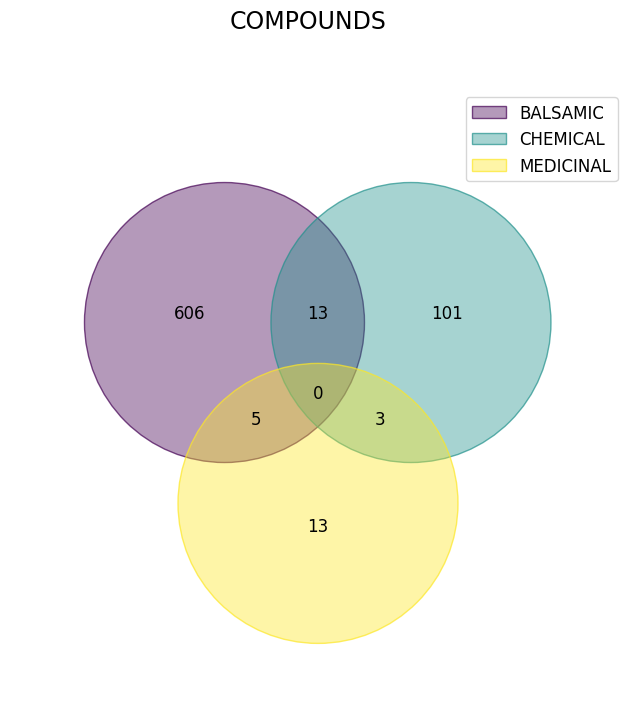

In [15]:
from venn import venn
import matplotlib.pyplot as plt
# Split dataset
BALSAMIC = result[result["FLAVOR_GROUP"]==str('balsamic')]
CHEMICAL = result[result["FLAVOR_GROUP"]==str('chemical')]
MEDICINAL = result[result["FLAVOR_GROUP"]==str('medicinal')]
# Generate venn diagram
COMPOUNDS = {"BALSAMIC":set(BALSAMIC["NEW_SMILES"]),
             "CHEMICAL":set(CHEMICAL["NEW_SMILES"]),
             "MEDICINAL":set(MEDICINAL["NEW_SMILES"])}
COMPOUNDS = venn(COMPOUNDS, fontsize=12)
plt.suptitle("COMPOUNDS", fontsize=17)